In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
User= pd.read_csv('User_Data(1).csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [9]:
User['Gender'] = le.fit_transform(User['Gender'])

In [10]:
User

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [11]:
User[['Gender','Age','EstimatedSalary','Purchased']]

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [12]:
New_User=User[['Gender','Age','EstimatedSalary','Purchased']]

In [13]:
New_User.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#Eliminate possible outliers

<Axes: ylabel='Age'>

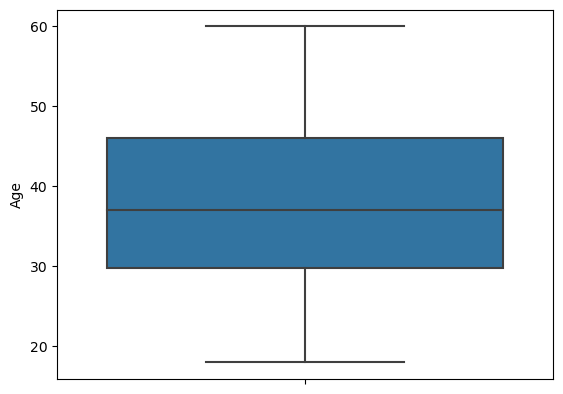

In [14]:
sns.boxplot(y='Age', data=New_User)

<Axes: ylabel='EstimatedSalary'>

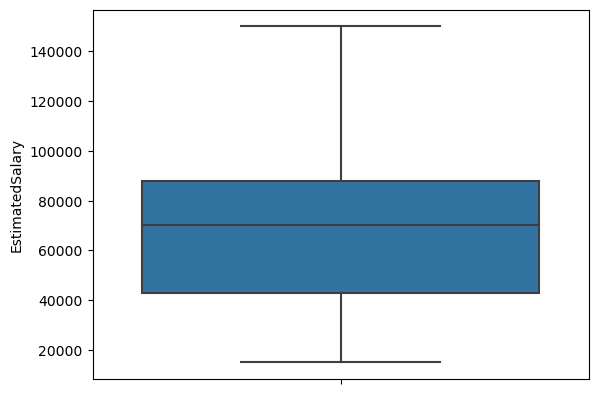

In [15]:
sns.boxplot(y='EstimatedSalary', data=New_User)

In [16]:
New_User.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [17]:
X = New_User[['Gender', 'Age', 'EstimatedSalary']]

In [18]:
Y = New_User['Purchased']

In [19]:
#Then we split it
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#create the object

In [22]:
model = DecisionTreeClassifier(criterion='entropy')

In [23]:
#We train our model with the dataset below

model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
#So after training, you can now predict outputs using the model.
Y_pred = model.predict(X_test)

In [25]:
Y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(Y_test,Y_pred)


array([[44,  5],
       [10, 21]], dtype=int64)

In [27]:
accuracy_score(Y_test,Y_pred)

0.8125

In [28]:
#Then we can visualize the results using heatmap below
cm = confusion_matrix(Y_test, Y_pred)

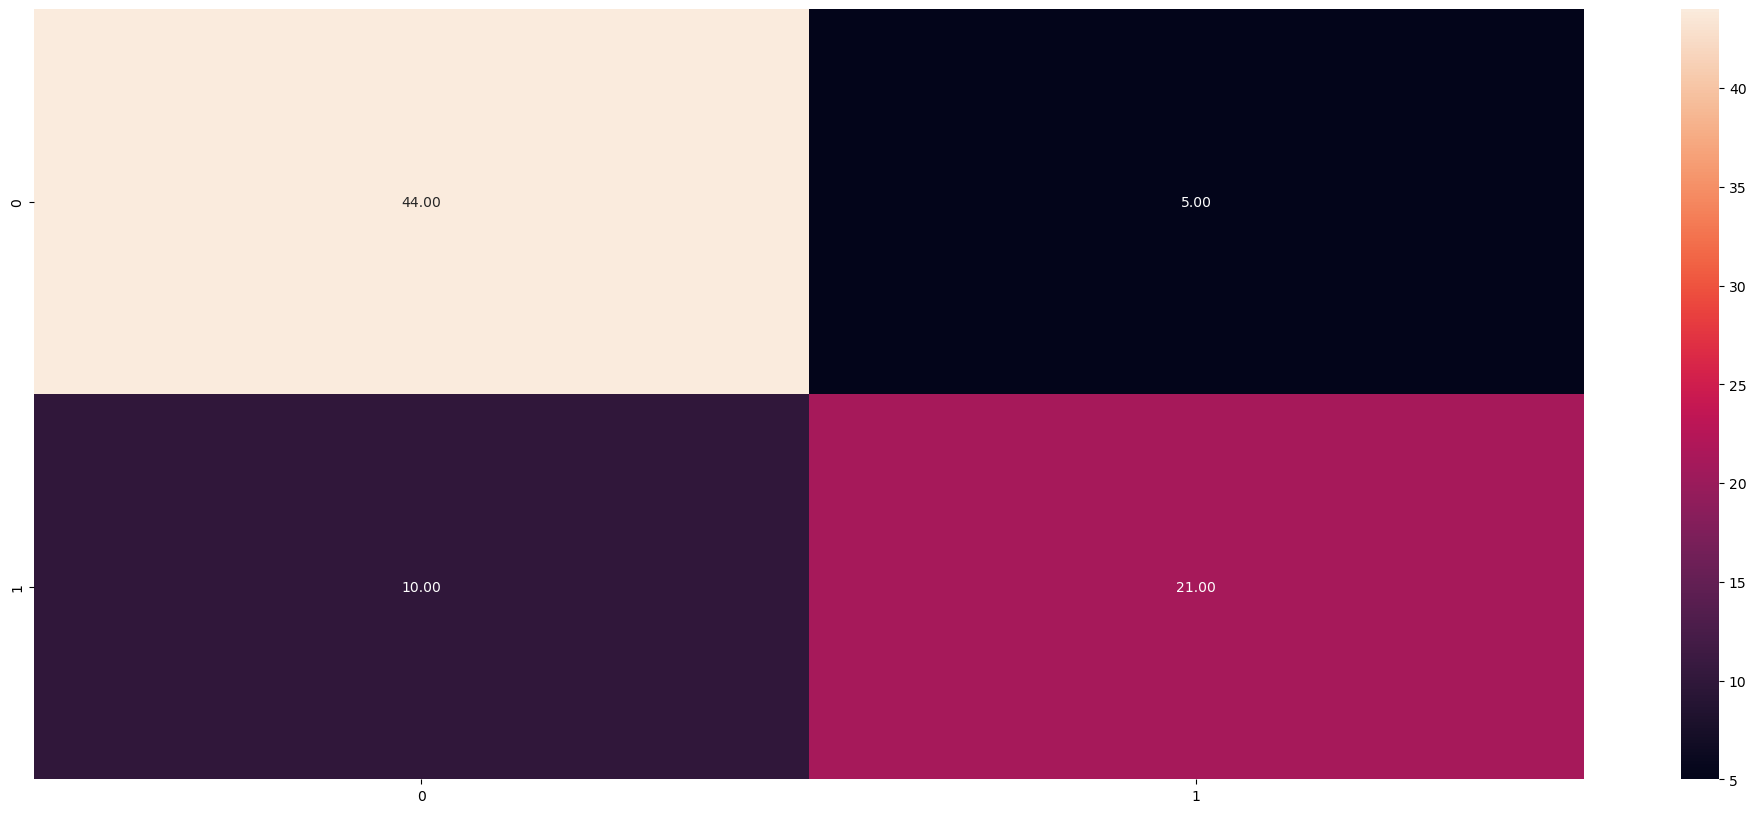

In [29]:
# Visualize the confusion matrix using Seabornsns.heatmap(cm, annot=True, fmt="d")
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.show()